# Regressão Multinomial com Python

Para esta aula, estaremos trabalhando com o conjunto de dados obtidos a partir do nosso livro texto. Os dados fazem referência a um estudo que tem o objetivo de identificar os fatores que influenciam a escolha alimentar dos jacarés. 

Para tanto no estudo foram capturados 219 jacarés em quatro Lagos da Flórida.

A resposta para esse levantamento é nominal, retorna o tipo de alimento primário, em volume, encontrado no estômago do  jacaré observado. Desta maneira temos cinco categorias: 
 - Peixe; 
 - Invertebrado; 
 - Réptil; 
 - Pássaro; 
 - Outro.

Outras classificações foram estabelecidas no estudo quanto aos jacarés, de acordo com: 
 - **Lago de captura:** Hancock, Oklawaha, Trafford, George; 
 - **Gênero:** macho, fêmea;
 - **Tamanho:** 
   - $\leq$ 2,3 metros de comprimento;
   - $>$ 2,3 metros de comprimento.



## Importar bibliotecas
Vamos importar algumas bibliotecas para começar!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Os dados

Vamos começar lendo o arquivo dados.csv em um DataFrame pandas.

In [2]:
train = pd.read_csv('dados.csv', sep=";")

In [3]:
train.head()

,id,lake,gender,size,food
0,45,Hancock,Female,> 2.3,Fish
1,80,Trafford,Male,<= 2.3,Fish
2,64,Oklawaha,Female,> 2.3,Reptile
3,19,Trafford,Female,> 2.3,Reptile
4,120,Trafford,Female,<= 2.3,Invertebrate


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
id        219 non-null int64
lake      219 non-null object
gender    219 non-null object
size      219 non-null object
food      219 non-null object
dtypes: int64(1), object(4)
memory usage: 8.6+ KB


# Análise exploratória



Nosso dataset

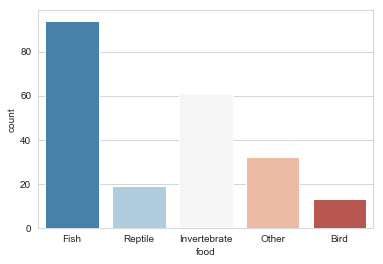

In [5]:
sns.set_style('whitegrid') #gera um gride para receber as barras do gráfico
sns.countplot(x='food',data=train,palette='RdBu_r') #definindo apaleta de cores azul e vermelho

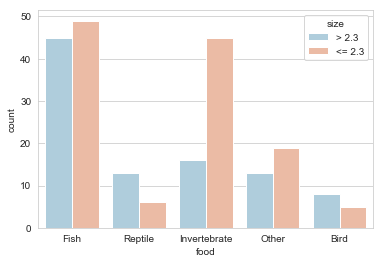

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='food',hue='size',data=train,palette='RdBu_r')

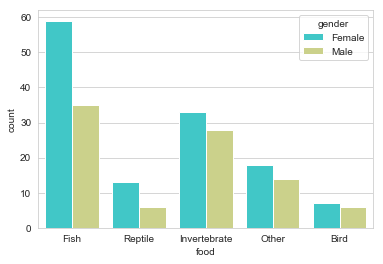

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='food',hue='gender',data=train,palette='rainbow')

## Convertendo recursos categóricos

Precisamos converter características categóricas em variáveis dummy usando pandas! Caso contrário, nosso algoritmo de Machine Learning não será capaz de aceitar esses recursos diretamente como entradas.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
id        219 non-null int64
lake      219 non-null object
gender    219 non-null object
size      219 non-null object
food      219 non-null object
dtypes: int64(1), object(4)
memory usage: 8.6+ KB


In [9]:
lake = pd.get_dummies(train['lake'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
gender = pd.get_dummies(train['gender'],drop_first=True)
size = pd.get_dummies(train['size'],drop_first=True)

In [10]:
train.drop(['lake','gender','size','id'],axis=1,inplace=True)

In [11]:
train = pd.concat([lake,gender,size,train['food']],axis=1)

In [12]:
train.head()

,Hancock,Oklawaha,Trafford,Male,> 2.3,food
0,1,0,0,0,1,Fish
1,0,0,1,1,0,Fish
2,0,1,0,0,1,Reptile
3,0,0,1,0,1,Reptile
4,0,0,1,0,0,Invertebrate


Ótimo! Nossos dados estão prontos para o nosso modelo

# Construindo um modelo de Regressão Multinomial

Vamos começar pelo feijão com arroz, dividindo nossos dados em um conjunto de treinamento e conjunto de testes.

## Divisão treino-teste

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('food',axis=1), 
                                                    train['food'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pichau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
predictions = logmodel.predict(X_test)

In [18]:
predictions

array(['Fish', 'Fish', 'Invertebrate', 'Invertebrate', 'Invertebrate',
       'Fish', 'Fish', 'Invertebrate', 'Invertebrate', 'Fish', 'Fish',
       'Invertebrate', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Fish',
       'Fish', 'Fish', 'Invertebrate', 'Invertebrate', 'Invertebrate',
       'Fish', 'Invertebrate', 'Fish', 'Fish', 'Fish', 'Fish',
       'Invertebrate', 'Fish', 'Invertebrate', 'Fish', 'Invertebrate',
       'Fish', 'Fish', 'Fish', 'Invertebrate', 'Fish', 'Fish', 'Fish',
       'Invertebrate', 'Fish', 'Invertebrate', 'Fish', 'Fish', 'Fish',
       'Fish', 'Invertebrate', 'Fish', 'Fish', 'Invertebrate', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Invertebrate', 'Fish', 'Fish',
       'Fish', 'Fish', 'Fish', 'Fish', 'Fish', 'Invertebrate'],
      dtype=object)

In [19]:
mul_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [20]:
 # Train multinomial logistic regression model
mul_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Vamos seguir em frente para avaliar o nosso modelo!

## Avaliação

Podemos verificar a precisão, o recall e a f1 Score usando o relatório de classificação (*classification_report*)!

In [21]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,mul_lr))

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
print(confusion_matrix(y_test,predictions))

[[ 0  3  0  0  0]
 [ 0 25  3  0  0]
 [ 0 10 12  0  0]
 [ 0  3  4  0  0]
 [ 0  5  1  0  0]]
